In [3]:
using JLD2
using FileIO
using PyPlot
using Statistics
using StatsBase 
using Distributions
using LinearAlgebra
using DSP
using HDF5
using Random123
using HDF5

In [4]:
using IntervalSets
using Random, ArraysOfArrays
using ValueShapes
using Measurements
using BAT

In [5]:
SMALL_SIZE = 9
MEDIUM_SIZE = 9
BIGGER_SIZE = 10

plt.rc("font", size=SMALL_SIZE)          # controls default text sizes
plt.rc("axes", titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc("axes", labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)    # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [76]:
include("../model-35/likelihood.jl")
include("../model-35/utill_model.jl")
include("../utill.jl")

plot_projections (generic function with 1 method)

In [7]:
conv_mat = load("../../data/experiment/dataset_2/m2/conv-matrix-upd-2.jld2")

conv_matrices = (
    cam_1 = conv_mat["cam_1"],
    cam_2 = conv_mat["cam_2"],
    cam_3 = conv_mat["cam_3"],
    cam_4 = conv_mat["cam_4"],
);


In [8]:
param_truth = (
    tr_size = [0.14, 0.14], 
    ang_spr = [4.0, 4.0], 
    waist = [2.90], 
    algmx = [36.0, 37.0, 19.0, 33.0], 
    algmy = [33.0, 34.0, 21.0, 35.0], 
    cam4_ped = 26.0, 
    cam4_light_fluct = 1.30, 
    cam4_light_amp = 8.90, 
    resx = [1, 1, 1], resy = [1, 1, 1], 
    cam4_resx = 3, 
    cam4_resy = 3, 
    psx = [27.1, 21.6, 114.0], 
    psy = [30.5, 23.4, 125.0], 
    cam4_psx = 121.8, 
    cam4_psy = 120.0, 
    light_amp = [8.5, 11.1, 2.5], 
    s_cam = [0.0, 1.478, 15.026, 23.115]
);

In [9]:
# event = generate_event(param_truth, 27.0, conv_matrices)

@load "../../data/sampling_results/Benchmark-6/event-35.jld" event

1-element Vector{Symbol}:
 :event

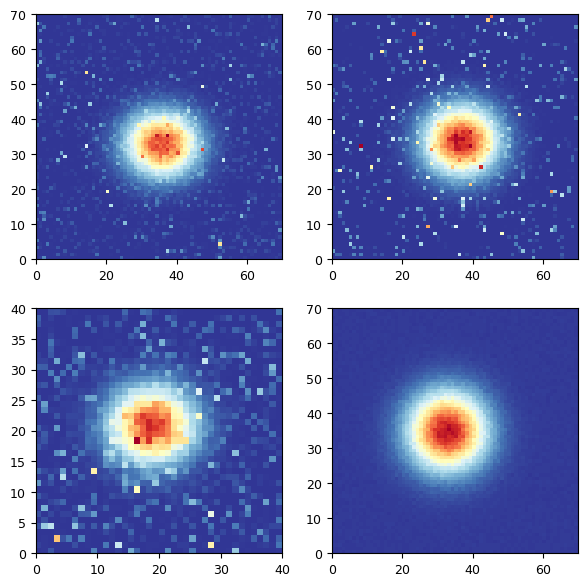

PyObject <matplotlib.collections.QuadMesh object at 0x7fedb0023250>

In [10]:
fig, ax = plt.subplots(2,2, figsize=(7,7))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

ax[1,1].pcolormesh(event.cam_1, cmap="RdYlBu_r")
ax[1,2].pcolormesh(event.cam_2, cmap="RdYlBu_r")
ax[2,1].pcolormesh(event.cam_3, cmap="RdYlBu_r")
ax[2,2].pcolormesh(event.cam_4, cmap="RdYlBu_r")

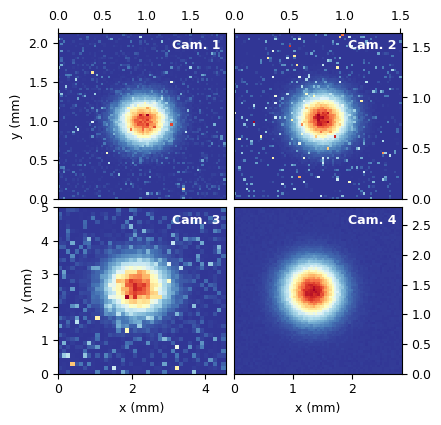

In [11]:
fig, ax = plt.subplots(2,2, figsize=(4.429223744292238, 4.429223744292238))

fig.subplots_adjust(hspace=0.05, wspace=0.05)

ev_number = 200

ax[1,1].pcolormesh(collect(0:70) .* 0.0271, collect(0:70) .* 0.0305,  event.cam_1, cmap="RdYlBu_r")
ax[1,2].pcolormesh(collect(0:70) .* 0.0216, collect(0:70) .* 0.0234, event.cam_2, cmap="RdYlBu_r")
ax[2,1].pcolormesh(collect(0:40) .* 0.114, collect(0:40) .* 0.125, event.cam_3, cmap="RdYlBu_r")
ax[2,2].pcolormesh(collect(0:70) .* 0.0406, collect(0:70) .* 0.0400, event.cam_4, cmap="RdYlBu_r")

ax[1,1].text(0.68,0.9,"Cam. 1", transform=ax[1].transAxes, color="white", fontweight="bold")
ax[1,2].text(0.68,0.9,"Cam. 2", transform=ax[1,2].transAxes, color="white", fontweight="bold")
ax[2,1].text(0.68,0.9,"Cam. 3", transform=ax[2,1].transAxes, color="white", fontweight="bold")
ax[2,2].text(0.68,0.9,"Cam. 4", transform=ax[2,2].transAxes, color="white", fontweight="bold")

ax[1,1].set_ylabel("y (mm)")
ax[2,1].set_ylabel("y (mm)")

ax[2,1].set_xlabel("x (mm)")
ax[2,2].set_xlabel("x (mm)")

ax[1,2].yaxis.set_label_position("right")
ax[1,2].yaxis.tick_right()

ax[2,2].yaxis.set_label_position("right")
ax[2,2].yaxis.tick_right()

ax[1,2].xaxis.set_label_position("top")
ax[1,2].xaxis.tick_top()

ax[1,1].xaxis.set_label_position("top")
ax[1,1].xaxis.tick_top()

# fig.savefig("../../plots/simulated-event-example.png", bbox_inches = "tight")

In [12]:
# @save "../../data/sampling_results/Benchmark-6/event-35.jld" event


In [13]:
# prior = NamedTupleDist(
#         tr_size = [truncated(Normal(0.14, 0.04), 0.06, 0.19), truncated(Normal(0.14, 0.04), 0.06, 0.19)],
#         ang_spr = [truncated(Normal(4.0, 2.0), 2.0, 7.0), truncated(Normal(4.0, 2.0), 2.0, 7.0)],
#         waist = [truncated(Normal(2.9, 0.03), 2.65, 3.5)],
#         algmx = [23.0 .. 48, 23.0 .. 48.0, 10.0 .. 30.0, 23.0 .. 48.0],
#         algmy = [23.0 .. 48, 23.0 .. 48.0, 10.0 .. 30.0, 23.0 .. 48.0],
#         cam4_ped = 4.0 .. 40.0,
#         cam4_light_fluct = 1.0 .. 3.0,
#         cam4_light_amp = 1.6 .. 9.9, 
#         resx = [1, 1, 1], # 23, 24, 25, 
#         resy = [1, 1, 1], # 26,27, 28, 
#         cam4_resx = truncated(Normal(3, 1.5), 0, Inf),
#         cam4_resy = truncated(Normal(3, 1.5), 0, Inf), 
#         psx = [27.1, 21.6, 114.0], # 31, 32, 33
#         psy = [30.5, 23.4, 125.0], # 34, 35, 36
#         cam4_psx = 121.8, # 37
#         cam4_psy = 120.0, # 38
#         light_amp  = [1.0 .. 13.0 , 1.0 .. 17.0, 1.0 .. 5.0], # 1.0 .. 5.0
#         s_cam = [0.0, 1.478, 15.026, 23.1150],
#     ); # first

prior = NamedTupleDist(
        tr_size = [0.13 .. 0.15, 0.13 .. 0.15],
        ang_spr = [3.5 .. 4.5, 3.5 .. 4.5],
        waist = [2.8 .. 3.0],
        algmx = [23.0 .. 48, 23.0 .. 48.0, 10.0 .. 30.0, 23.0 .. 48.0],
        algmy = [23.0 .. 48, 23.0 .. 48.0, 10.0 .. 30.0, 23.0 .. 48.0],
        cam4_ped = 4.0 .. 40.0,
        cam4_light_fluct = 1.0 .. 3.0,
        cam4_light_amp = 1.6 .. 9.9, 
        resx = [1, 1, 1], # 23, 24, 25, 
        resy = [1, 1, 1], # 26,27, 28, 
        cam4_resx = 2.0 .. 4.0,
        cam4_resy = 2.0 .. 4.0, 
        psx = [27.1, 21.6, 114.0], # 31, 32, 33
        psy = [30.5, 23.4, 125.0], # 34, 35, 36
        cam4_psx = 121.8, # 37
        cam4_psy = 120.0, # 38
        light_amp  = [1.0 .. 13.0 , 1.0 .. 17.0, 1.0 .. 5.0], # 1.0 .. 5.0
        s_cam = [0.0, 1.478, 15.026, 23.1150],
    );

In [14]:
"""
    Log-Likelihood of the beamline (4 cameras included)
"""
function log_lik_ndiff(;  
    e = event,
    cv_mat = conv_matrices,
    func = conv_tabl_discrete,
    cv_1 = cv_mat.cam_1,
    cv_2 = cv_mat.cam_2,
    cv_3 = cv_mat.cam_3,
    n_threads = Threads.nthreads(),
    )
    
    return params -> begin 
        ll = 0.0
        ll += likelihood_cam13(params, e.cam_1, e.population, cv_1, func, 1, n_threads=n_threads)
        ll += likelihood_cam13(params, e.cam_2, e.population, cv_2, func, 2, n_threads=n_threads)
        ll += likelihood_cam13(params, e.cam_3, e.population, cv_3, func, 3, n_threads=n_threads)
        ll += likelihood_cam4(params, e.cam_4, e.population, 4, n_threads=n_threads)
        return LogDVal(ll)
    end
        
end

log_likelihood = log_lik_ndiff()

#51 (generic function with 1 method)

In [15]:
posterior = PosteriorDensity(log_likelihood, prior)

tuning = AdaptiveMHTuning(
    λ = 0.5,
    α = ClosedInterval(0.15,0.25),
    β = 1.5,
    c = ClosedInterval(1e-4,1e2),
    r = 0.5,
)

mcmcalgo = MetropolisHastings(
    weighting = RepetitionWeighting(),
    tuning = tuning
)

rng = Philox4x()

init = MCMCChainPoolInit(
    init_tries_per_chain = 50 .. 150,
    nsteps_init = 1500
)

burnin = MCMCMultiCycleBurnin(
    max_ncycles = 160,
    nsteps_per_cycle = 40000
)

nsamples = 5*10^5
nchains = 4

convergence = BrooksGelmanConvergence(threshold=1.15);

In [16]:
# @time samples_tot = bat_sample(
#     posterior, nchains*nsamples, algorithm,
#     max_neval = nchains*nsamples,
#     max_time = Inf,
# );

# samples = samples_tot.result;

LoadError: UndefVarError: samples_tot not defined

In [17]:
samples = bat_read("../../data/sampling_results/Benchmark-6/samples-35.hdf5").result
samples = varshape(prior).(samples);

In [18]:
minimum(bat_eff_sample_size(unshaped.(samples)).result)

577.1279439600025

In [19]:
size(flatview(unshaped.(samples.v)))

(21, 85612)

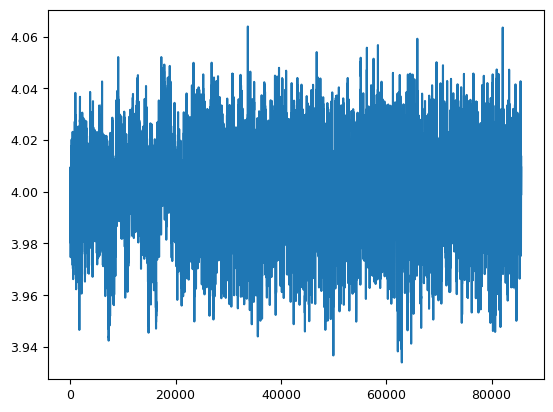

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7fed7e1da460>

In [20]:
plot(flatview(unshaped.(samples.v))[3,:])

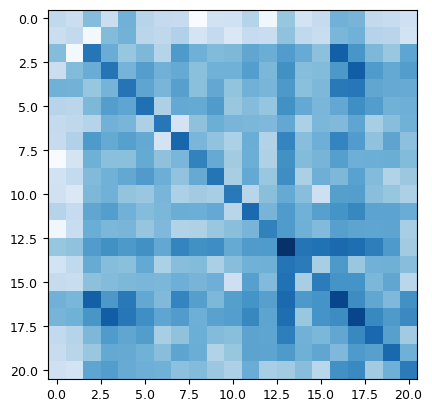

PyObject <matplotlib.image.AxesImage object at 0x7fed76faeaf0>

In [21]:
plt.imshow(log.(abs.(cov(flatview(unshaped.(samples.v))'))), cmap="Blues")

In [22]:
# BAT.bat_write("../../data/sampling_results/Benchmark-6/samples-35.hdf5", unshaped.(samples))

In [23]:
#  27.1, 21.6, 114.0, 30.5, 23.4, 125.0, 121.8, 120.0

In [24]:
findmode_result = bat_findmode(posterior, MaxDensityNelderMead(init = ExplicitInit([mode(samples)])))

fit_par_values = findmode_result.result[]

┌ Info: Using tranform algorithm DensityIdentityTransform()
└ @ BAT /user/.julia/packages/BAT/8MnfJ/src/algotypes/bat_default.jl:44


(tr_size = [0.13896092226712167, 0.1401820352796507], ang_spr = [3.9947446500715835, 3.959165756920846], waist = [2.9220011223174023], algmx = [36.000635813295375, 36.99252509818263, 18.96498890129383, 32.99135425870216], algmy = [33.005293444798525, 33.97994241047816, 20.988700226947337, 35.01530996791214], cam4_ped = 26.100315369611458, cam4_light_fluct = 1.3007738434269727, cam4_light_amp = 8.89405920249018, resx = [1, 1, 1], resy = [1, 1, 1], cam4_resx = 3.0123709311854174, cam4_resy = 3.1540166771793134, psx = [27.1, 21.6, 114.0], psy = [30.5, 23.4, 125.0], cam4_psx = 121.8, cam4_psy = 120.0, light_amp = [8.49708569375318, 11.11425635928757, 2.499255407923819], s_cam = [0.0, 1.478, 15.026, 23.115])

In [25]:
mode(samples)[1]

(tr_size = [0.13910174994833424, 0.1401658842017989], ang_spr = [4.000267839652331, 3.9658767276261266], waist = [2.9216454877993185], algmx = [35.99844851796993, 36.96932394078214, 18.968878595102126, 32.987575712566965], algmy = [32.994751814378944, 33.98729526877097, 21.00560217312339, 35.011966152313505], cam4_ped = 26.100647581050993, cam4_light_fluct = 1.2979609228298994, cam4_light_amp = 8.8985808660175, resx = [1, 1, 1], resy = [1, 1, 1], cam4_resx = 2.997910389346066, cam4_resy = 3.1360924710727733, psx = [27.1, 21.6, 114.0], psy = [30.5, 23.4, 125.0], cam4_psx = 121.8, cam4_psy = 120.0, light_amp = [8.492767162656806, 11.082779231860325, 2.4948313736130374], s_cam = [0.0, 1.478, 15.026, 23.115])

In [26]:
bat_marginalmode(samples).result

ShapedAsNT((tr_size = [0.13895000000000002, 0.14009], ang_spr = [4.0024999999999995, 3.9745], waist = [2.9215], algmx = [35.9975, 36.9985, 18.9735, 32.994749999999996], algmy = [32.9955, 33.9715, 20.985500000000002, 35.01675], cam4_ped = 26.0775, cam4_light_fluct = 1.29425, cam4_light_amp = 8.89175, resx = [1, 1, 1], resy = [1, 1, 1], cam4_resx = 2.9775, cam4_resy = 3.1125, psx = [27.1, 21.6, 114.0], psy = [30.5, 23.4, 125.0], cam4_psx = 121.8, cam4_psy = 120.0, light_amp = [8.4925, 11.1075, 2.50175], s_cam = [0.0, 1.478, 15.026, 23.115]))

In [27]:
mean(samples)[1]

(tr_size = [0.13889434941104886, 0.14001453402723738], ang_spr = [4.00045919891467, 3.968410242905574], waist = [2.921368846646589], algmx = [35.99569008844513, 36.99425955220546, 18.96951158781202, 32.99370865599239], algmy = [32.996524107749444, 33.97288517322249, 20.98580526707724, 35.01555011040191], cam4_ped = 26.098511233991466, cam4_light_fluct = 1.2940193933430744, cam4_light_amp = 8.89281204022332, resx = [1, 1, 1], resy = [1, 1, 1], cam4_resx = 2.990131048122652, cam4_resy = 3.116313838063987, psx = [27.1, 21.6, 114.0], psy = [30.5, 23.4, 125.0], cam4_psx = 121.8, cam4_psy = 120.0, light_amp = [8.497464258975812, 11.110264307257525, 2.4965263525391412], s_cam = [0.0, 1.478, 15.026, 23.115])

In [28]:
std(samples)[1]

(tr_size = [0.0004476471682614863, 0.00042934540631778923], ang_spr = [0.015914287417368046, 0.01657457429583403], waist = [0.016258679943652696], algmx = [0.01854967164176586, 0.015134393194369797, 0.02520192404180954, 0.010873424788311967], algmy = [0.01645447222949377, 0.013776964386419698, 0.022355564448922085, 0.011046152378721256], cam4_ped = 0.12301812232329916, cam4_light_fluct = 0.013422874735212, cam4_light_amp = 0.012809354727258736, resx = 3-element Fill{Int64}: entries equal to 0, resy = 3-element Fill{Int64}: entries equal to 0, cam4_resx = 0.06251343920625686, cam4_resy = 0.06430618327427817, psx = 3-element Fill{Float64}: entries equal to 0.0, psy = 3-element Fill{Float64}: entries equal to 0.0, cam4_psx = 0.0, cam4_psy = 0.0, light_amp = [0.022409956553314528, 0.023411389455865437, 0.013233089790687796], s_cam = 4-element Fill{Float64}: entries equal to 0.0)

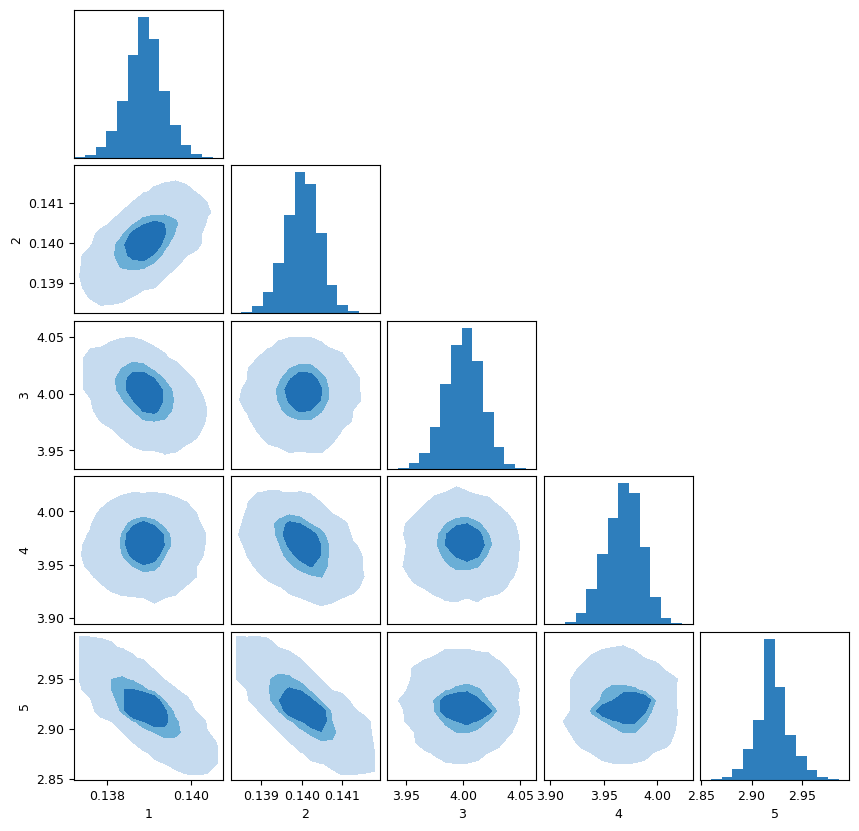

In [29]:
dims = [1,2,3,4,5,]
names = [1,2,3,4,5,6,7,8,9,10, 11]
levels = [0.001, 0.55, 0.9, 0.95,  1,]
# levels = [0.001, 0.90, 1,]
figsize = (10,10)
n_bins = 15

corner_plots(samples, dims, names, levels_quantiles = levels, figsize=figsize, N_bins=n_bins)

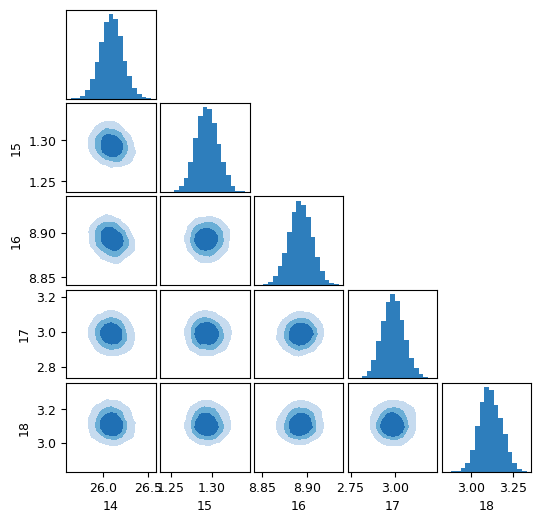

In [30]:
dims = [14, 15, 16, 17, 18]
names = [14, 15, 16, 17, 18]
levels = [0.1, 0.8, 0.9, 0.95,  1,]
figsize = (6,6)
n_bins = 20

corner_plots(samples, dims, names, levels_quantiles = levels, figsize=figsize, N_bins=n_bins)

In [31]:
flat_truth = vcat([i for i in param_truth]...)
flat_mode = vcat([i for i in mode(samples)[1]]...) ./flat_truth
flat_std = vcat([i for i in std(samples)[1]]...)./flat_truth;

In [54]:
labels = [
    L"\sigma_x", 
    L"\sigma_y", 
    L"\sigma'_x", 
    L"\sigma'_y", 
    L"s_w",
    L"\mu_{1,x}", 
    L"\mu_{2,x}",
    L"\mu_{3,x}", 
    L"\mu_{4,x}",
    L"\mu_{1,y}", 
    L"\mu_{2,y}",
    L"\mu_{3,y}", 
    L"\mu_{4,y}",
    L"p_4", 
    L"f_4", 
    L"i_4", 
    L"\tilde{\sigma}_{4,x}", 
    L"\tilde{\sigma}_{4,y}",
    L"i_1", 
    L"i_2", 
    L"i_3"
];

In [55]:
samples_uw = bat_sample(samples, OrderedResampling(nsamples=10^4)).result;

┌ Info: Initializing new RNG of type Philox4x{UInt64, 10}
└ @ BAT /user/.julia/packages/BAT/8MnfJ/src/algotypes/bat_default.jl:44


In [56]:
truth = [0.14, 0.14, 4.0, 4.0, 2.9, 36.0, 37.0, 19.0, 33.0, 33.0, 34.0, 21.0, 35.0, 26, 1.3, 8.9, 3, 3, 8.5, 11.1, 2.5]
samples_flat = flatview(unshaped.(samples_uw.v)) ./ truth;

In [57]:
data = [i for i in eachrow(samples_flat)];
quant = [(0.01, 0.99) for i in eachrow(samples_flat)];

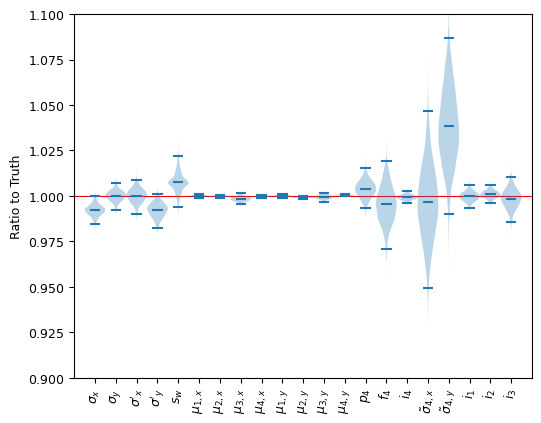

In [73]:
fig, ax = plt.subplots(1,1, figsize=(5.905631659056317, 4.724505327245054))

ax.axhline(1.0, linestyle="-", lw=0.8, color="red", alpha=1.0, zorder=0)

parts = ax.violinplot(data, widths = 1.0, vert=true, showmeans=true, showextrema=false, quantiles=quant)

# for pc in parts["bodies"]
#     pc.set_facecolor("gray")
#     pc.set_edgecolor("black")
#     pc.set_alpha(0.5)
#     pc.set_linewidth(2)
# end

ax.set_xlim(0.0, length(data)+1)

ax.set_xticks(collect(Base.OneTo(length(data))))
ax.set_xticklabels(labels, rotation = 90, ha="center")
# ax.legend(loc="upper left")
ax.set_ylabel("Ratio to Truth")

ax.set_ylim(0.9, 1.1)

fig.savefig("../../plots/toy-violin-1.pdf", bbox_inches = "tight")

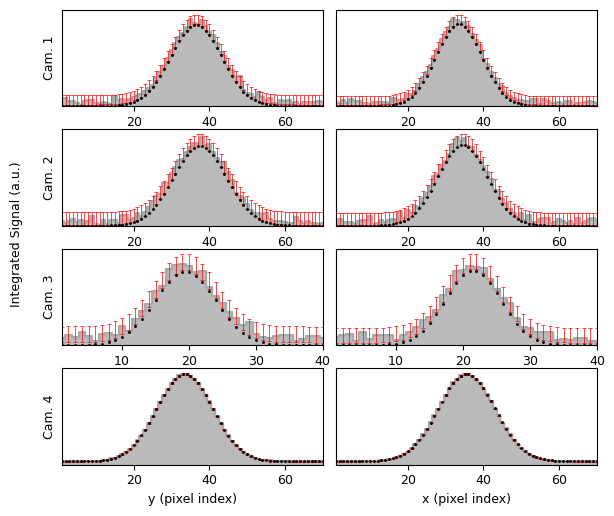

In [77]:
plot_projections(conv_matrices, event, event, mean(samples)[1], 
    isnontr = true, 
    figsize=(6.905631659056317, 5.905631659056317),
    saveplot = false,
    filename = "../../plots/toy_proj-1.pdf"
)